### Visualising DC clusters only (re-doing from pre-hvg onwards instead of just re-mapping before calculating DEGs)
### Using bbknn for batch correction instead of harmony

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
# read in data
data = sc.read_h5ad('20250617_AllDC_bbknn.h5ad')

In [4]:
data

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions'

In [5]:
# Set colours for NR_annotations_simple plot:
data.uns["NR_annotations_simple_colors"] = ['#e377c2', '#aa40fc', '#8c564b']  

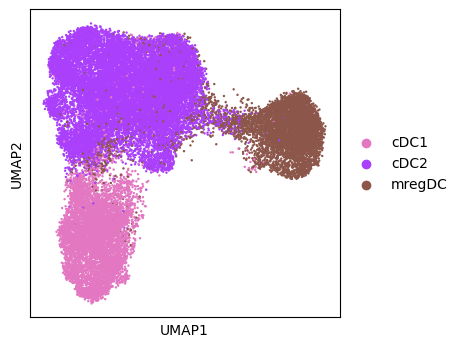

In [6]:
#export high res umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="NR_annotations_simple", 
               size=12,
               title="")

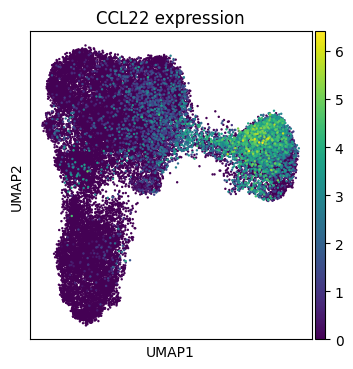

In [7]:
#export high res umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="CCL22", 
               size=12,
               title="CCL22 expression")

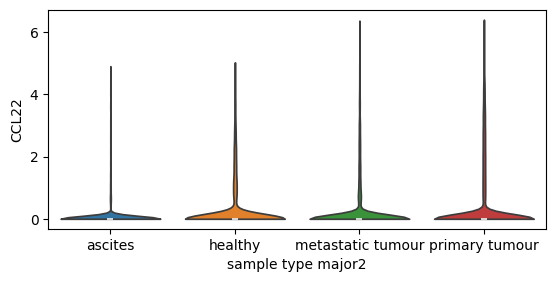

In [ ]:
# Plot violin
with plt.rc_context({"figure.figsize": (6, 3)}):
        sc.pl.violin(
            data,
            keys="CCL22",
            groupby='sample_type_major2',
            stripplot=False,
            inner='box',
            show=True  
        )

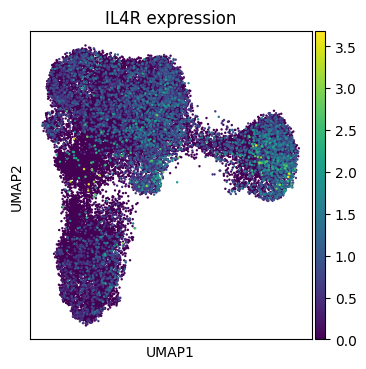

In [11]:
#export high res umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="IL4R", 
               size=12,
               title="IL4R expression")

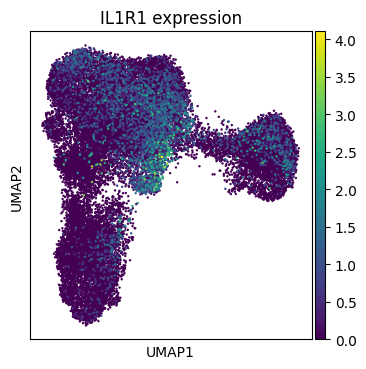

In [22]:
#export high res umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="IL1R1", 
               size=12,
               title="IL1R1 expression")

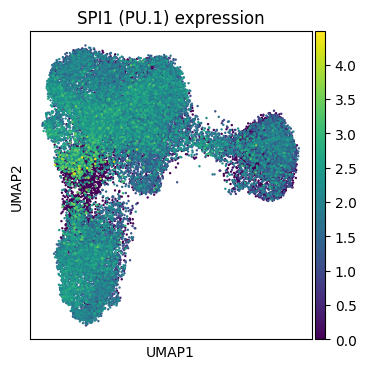

In [10]:
#export high res umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="SPI1", 
               size=12,
               title="SPI1 (PU.1) expression")

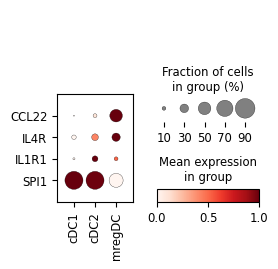

In [11]:
sc.pl.dotplot(data, ["CCL22","IL4R","IL1R1","SPI1"], groupby="NR_annotations_simple", standard_scale="var", swap_axes=True)

In [12]:
# Subset to only primary tumours
data_OC = data[data.obs["cancer_with_H"].isin(["HGSOC"])]
data_OC_DC1 = data_OC[data_OC.obs["NR_annotations_simple"].isin(["cDC1"])]
data_OC_DC2 = data_OC[data_OC.obs["NR_annotations_simple"].isin(["cDC2"])]
data_OC_mregDC = data_OC[data_OC.obs["NR_annotations_simple"].isin(["mregDC"])]

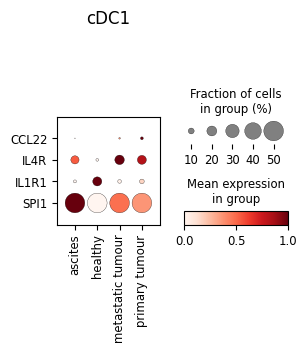

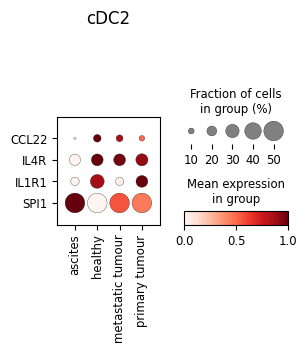

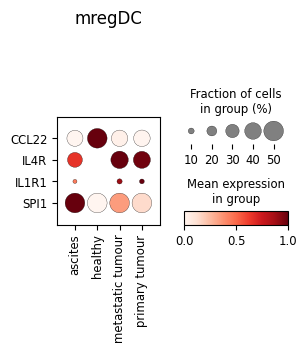

In [13]:
sc.pl.dotplot(data_OC_DC1, ["CCL22","IL4R","IL1R1","SPI1"], groupby="sample_type_major2", standard_scale="var", swap_axes=True, title = 'cDC1', vmin=0.0, vmax=1.0, dot_min=0.0, dot_max=0.5)
sc.pl.dotplot(data_OC_DC2, ["CCL22","IL4R","IL1R1","SPI1"], groupby="sample_type_major2", standard_scale="var", swap_axes=True, title = 'cDC2', vmin=0.0, vmax=1.0, dot_min=0.0, dot_max=0.5)
sc.pl.dotplot(data_OC_mregDC, ["CCL22","IL4R","IL1R1","SPI1"], groupby="sample_type_major2", standard_scale="var", swap_axes=True, title = 'mregDC', vmin=0.0, vmax=1.0, dot_min=0.0, dot_max=0.5)

In [15]:
# Subset to only primary tumours
data_OC_P = data_OC[data_OC.obs["sample_type_major2"].isin(["primary tumour"])]
data_OC_M = data_OC[data_OC.obs["sample_type_major2"].isin(["metastatic tumour"])]
data_OC_A = data_OC[data_OC.obs["sample_type_major2"].isin(["ascites"])]
data_OC_H = data_OC[data_OC.obs["sample_type_major2"].isin(["healthy"])]

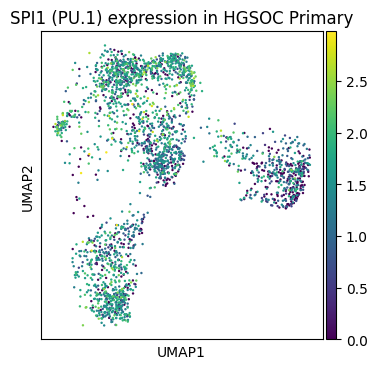

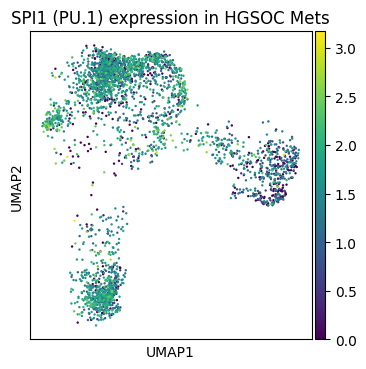

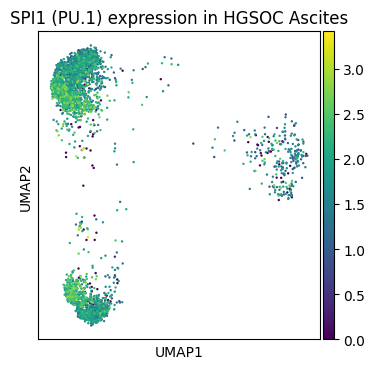

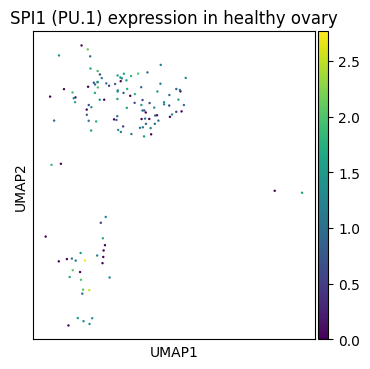

In [16]:
#export high res umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_OC_P, color="SPI1", size=12, title="SPI1 (PU.1) expression in HGSOC Primary")
    sc.pl.umap(data_OC_M, color="SPI1", size=12, title="SPI1 (PU.1) expression in HGSOC Mets")
    sc.pl.umap(data_OC_A, color="SPI1", size=12, title="SPI1 (PU.1) expression in HGSOC Ascites")
    sc.pl.umap(data_OC_H, color="SPI1", size=12, title="SPI1 (PU.1) expression in healthy ovary")

# Investigate ISG signature by cancer type:

In [20]:
# Subset to only primary tumours
data_P = data[data.obs["sample_type_major2"].isin(["primary tumour"])]

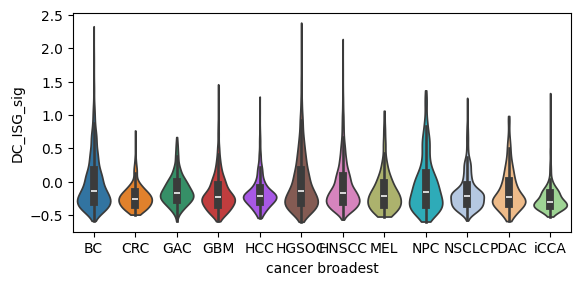

In [29]:
# Plot violin
with plt.rc_context({"figure.figsize": (6, 3)}):
        sc.pl.violin(
            data_P,
            keys="DC_ISG_sig",
            groupby='cancer_broadest',
            stripplot=False,
            inner='box',
            show=True  
            #save=f"_DC_sigoverlay_Violin_{gene}.svg"
        )

In [21]:
#Check cancer types in cancer_broadest
data_P.obs["cancer_broadest"].value_counts()

cancer_broadest
HNSCC    5912
NSCLC    3154
HGSOC    2541
BC       2182
GBM       949
HCC       656
NPC       460
PDAC      434
GAC       358
MEL       284
iCCA      206
CRC       200
Name: count, dtype: int64

In [22]:
# Make object for each cancer type
data_HNSCC = data[data.obs["cancer_broadest"].isin(["HNSCC"])]
data_NSCLC = data[data.obs["cancer_broadest"].isin(["NSCLC"])]
data_HGSOC = data[data.obs["cancer_broadest"].isin(["HGSOC"])]
data_BC = data[data.obs["cancer_broadest"].isin(["BC"])]
data_GBM = data[data.obs["cancer_broadest"].isin(["GBM"])]
data_HCC = data[data.obs["cancer_broadest"].isin(["HCC"])]
data_NPC = data[data.obs["cancer_broadest"].isin(["NPC"])]
data_PDAC = data[data.obs["cancer_broadest"].isin(["PDAC"])]
data_GAC = data[data.obs["cancer_broadest"].isin(["GAC"])]
data_MEL = data[data.obs["cancer_broadest"].isin(["MEL"])]
data_iCCA = data[data.obs["cancer_broadest"].isin(["iCCA"])]
data_CRC = data[data.obs["cancer_broadest"].isin(["CRC"])]

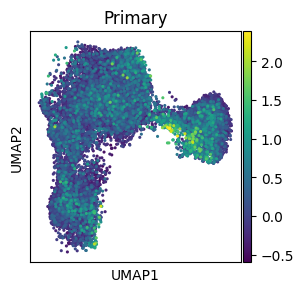

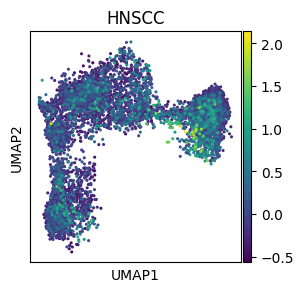

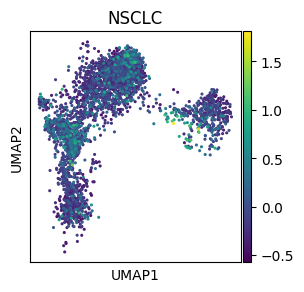

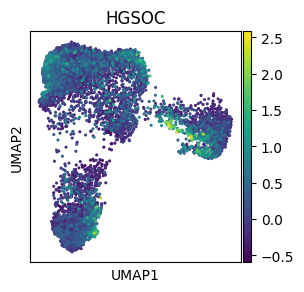

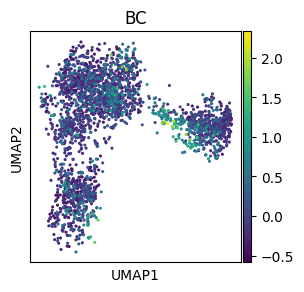

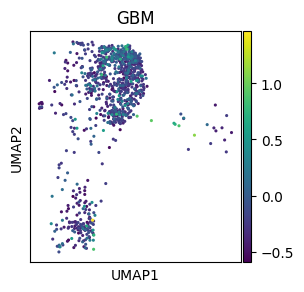

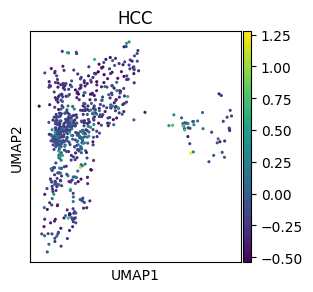

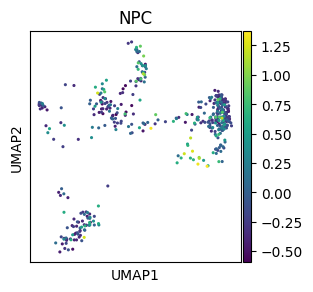

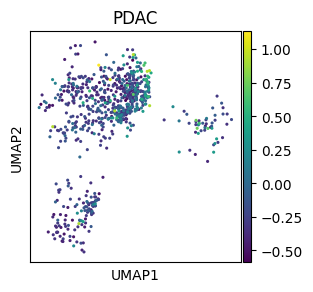

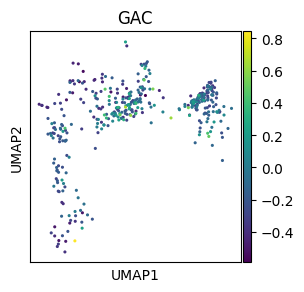

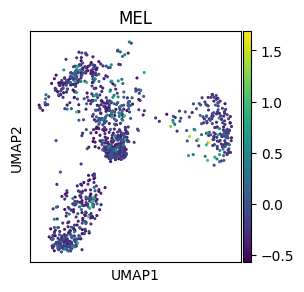

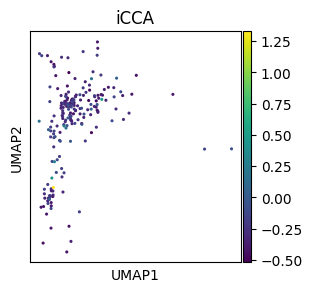

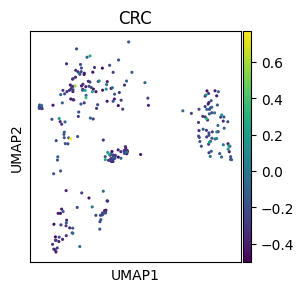

In [26]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_P, color="DC_ISG_sig", ncols=1, size=20, title="Primary")
    sc.pl.umap(data_HNSCC, color="DC_ISG_sig", ncols=1, size=20, title="HNSCC")
    sc.pl.umap(data_NSCLC, color="DC_ISG_sig", ncols=1, size=20, title="NSCLC")
    sc.pl.umap(data_HGSOC, color="DC_ISG_sig", ncols=1, size=20, title="HGSOC")
    sc.pl.umap(data_BC, color="DC_ISG_sig", ncols=1, size=20, title="BC")
    sc.pl.umap(data_GBM, color="DC_ISG_sig", ncols=1, size=20, title="GBM")
    sc.pl.umap(data_HCC, color="DC_ISG_sig", ncols=1, size=20, title="HCC")
    sc.pl.umap(data_NPC, color="DC_ISG_sig", ncols=1, size=20, title="NPC")
    sc.pl.umap(data_PDAC, color="DC_ISG_sig", ncols=1, size=20, title="PDAC")
    sc.pl.umap(data_GAC, color="DC_ISG_sig", ncols=1, size=20, title="GAC")
    sc.pl.umap(data_MEL, color="DC_ISG_sig", ncols=1, size=20, title="MEL")
    sc.pl.umap(data_iCCA, color="DC_ISG_sig", ncols=1, size=20, title="iCCA")
    sc.pl.umap(data_CRC, color="DC_ISG_sig", ncols=1, size=20, title="CRC")

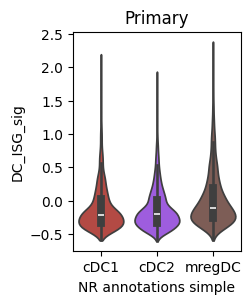

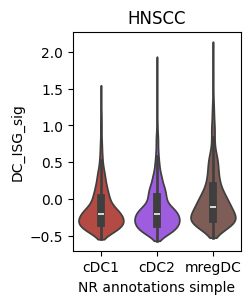

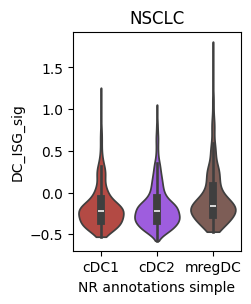

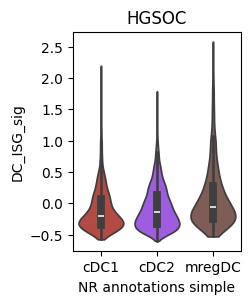

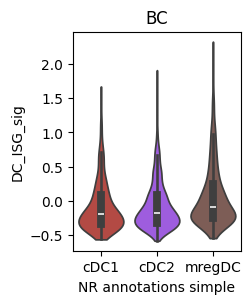

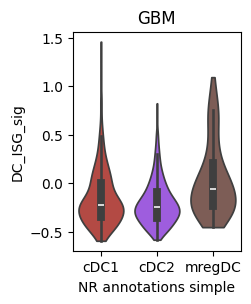

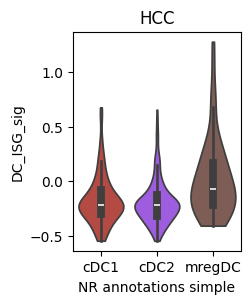

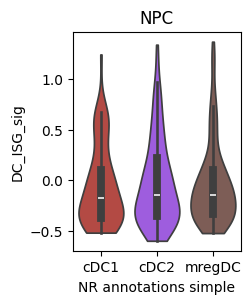

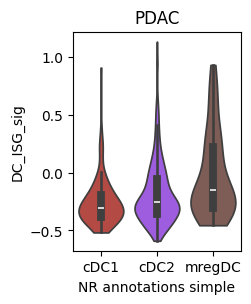

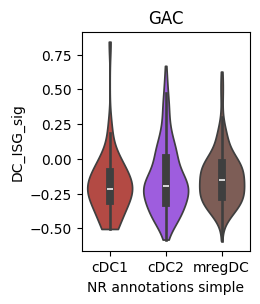

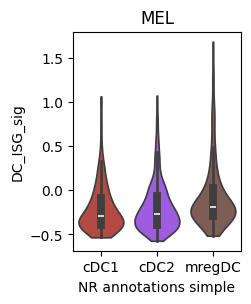

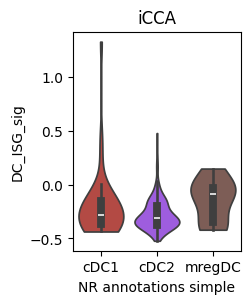

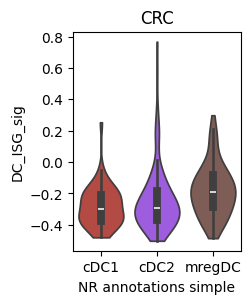

In [38]:
# Plot violin
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.violin(data_P, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("Primary")
    plt.show()

    sc.pl.violin(data_HNSCC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("HNSCC")
    plt.show()

    sc.pl.violin(data_NSCLC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("NSCLC")
    plt.show()

    sc.pl.violin(data_HGSOC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("HGSOC")
    plt.show()

    sc.pl.violin(data_BC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("BC")
    plt.show()

    sc.pl.violin(data_GBM, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("GBM")
    plt.show()

    sc.pl.violin(data_HCC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("HCC")
    plt.show()

    sc.pl.violin(data_NPC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("NPC")
    plt.show()

    sc.pl.violin(data_PDAC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("PDAC")
    plt.show()

    sc.pl.violin(data_GAC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("GAC")
    plt.show()

    sc.pl.violin(data_MEL, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("MEL")
    plt.show()

    sc.pl.violin(data_iCCA, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("iCCA")
    plt.show()

    sc.pl.violin(data_CRC, keys="DC_ISG_sig", groupby='NR_annotations_simple', stripplot=False, inner='box', show=False)
    plt.title("CRC")
    plt.show()

# Comparing ISG Sigs:

In [4]:
Cheng_DC2_ISG15 = ['ISG15','IFI6','IFIT1','IFITM1','IFIT2'] 
Moon_DC_ISG = ['ISG15', 'ISG20', 'CXCL9', 'CXCL10', 'IFIT1', 'IFIT3', 'IFI6', 'GBP2']

In [5]:
# Define dictionary of gene sets
gene_sets = {
    "Cheng_DC2_ISG15_sig": Cheng_DC2_ISG15,
    "Moon_DC_ISG_sig": Moon_DC_ISG,
}

In [6]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

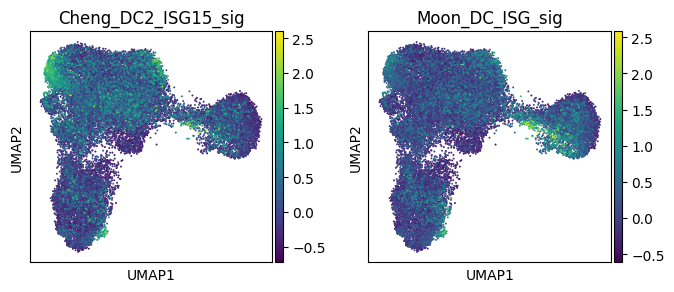

In [7]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=gene_sets, ncols=2, size=8)

# Overlaying Guimaraes DC_CXCL8 (CXCL2) Sig:

In [11]:
Gui_CXCL2 = ['CXCL8','CXCL2'] 

In [12]:
# Define dictionary of gene sets
gene_sets = {
    "Gui_CXCL2_sig": Gui_CXCL2,
}

In [13]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

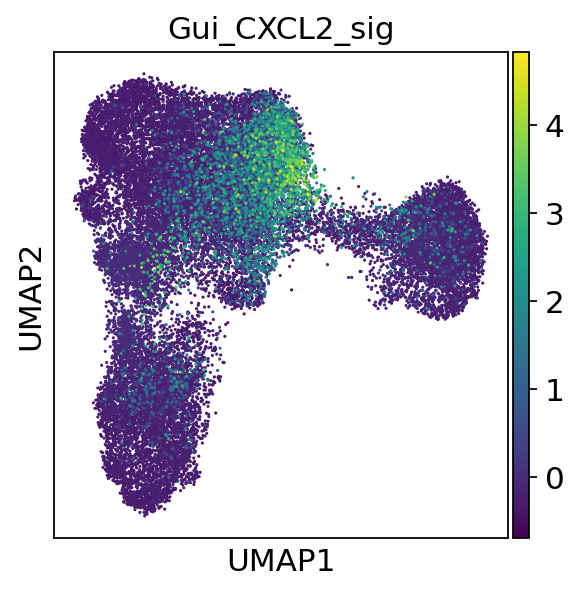

In [17]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=gene_sets, ncols=2, size=8)

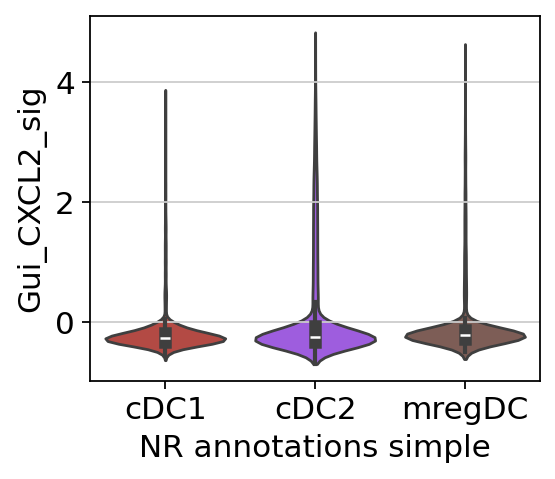

In [16]:
# Plot violins
with plt.rc_context({"figure.figsize": (4, 3)}):
    for gene in gene_sets.keys():
        sc.pl.violin(
            data,
            keys=gene,
            groupby='NR_annotations_simple',
            stripplot=False,
            inner='box',
            show=True
            #save=f"_DC_sigoverlay_Violin_{gene}.svg"
        )

# Overlaying CD1A and LTB (cDC2A Sig)

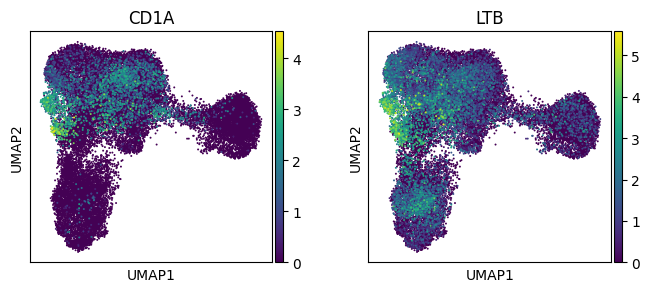

In [ ]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=["CD1A","LTB"], ncols=2, size=8)

In [5]:
DC2A = ['LTB','CD1A'] 

In [6]:
# Define dictionary of gene sets
gene_sets = {
    "DC2A_sig": DC2A
}

In [7]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

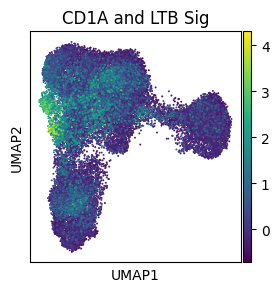

In [10]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=gene_sets, ncols=1, size=8, title="CD1A and LTB Sig")

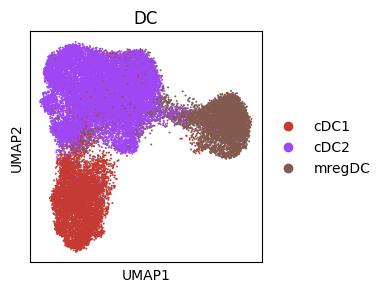

In [12]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color="NR_annotations_simple", ncols=1, size=8, title="DC")